## Imports

In [1]:
#imports

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os

In [2]:
#read csv file


#csv files
file = "../experimental_data/old_data/ewc_music_experiment_1.csv"

data = pd.read_csv(file, header=None)

data

,0,1,2
0,0.000000,2.043592,0.000000
1,0.000000,2.043592,0.000000
2,33.333334,1.710258,1.000000
3,25.000000,1.793592,-0.333333
4,20.000000,1.843592,-0.250000
5,16.666667,1.876925,-0.200000
6,100.000000,0.000000,0.000000
7,50.000000,14392.282227,0.000000
8,33.333334,1450.758911,0.000000
9,24.027404,330.075623,-0.120000


0       0.000000
1       0.000000
2      33.333334
3      25.000000
4      20.000000
5      16.666667
6     100.000000
7      50.000000
8      33.333334
9      24.027404
10     20.000000
11     16.666667
Name: 0, dtype: float64


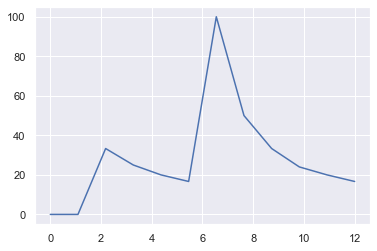

In [3]:
sns.set()

y = data.iloc[:, 0]
x = np.linspace(0, y.shape[0], y.shape[0])

print(y)
plt.plot(x,y )

# Forest Data

In [4]:
# Selecting multiple files

directory = '../experimental_data/old_data'

ewcfile = '../experimental_data/iteration 1/ewc_forest_experiment_1.csv'
fedewcfile = "../experimental_data/iteration 1/ewc_forest_experiment_2.csv"
gemfile = "../experimental_data/iteration 1/gem_forest_experiment_1.csv"
fedgemfile = "../experimental_data/iteration 1/gem_forest_experiment_2.csv"
fedweitfile = "../experimental_data/iteration 1/weit_forest_experiment_1.csv"

headers = ['Accuracy', "Loss", "Backwards Transfer"]
# datasets = ["EWC", "FedEWC", "GEM", "FedWEIT"]

ewc = pd.read_csv(ewcfile, header = None, names=headers)
fedewc = pd.read_csv(fedewcfile, header = None, names=headers)
gem = pd.read_csv(gemfile, header = None, names=headers)
fedgem = pd.read_csv(fedgemfile, header = None, names=headers)
fedweit = pd.read_csv(fedweitfile, header = None, names=headers)

# dataframes = [ewc, fedewc, gem, fedweit]


# data = pd.concat(dataframes, axis = 1, keys = datasets)

# print(data["EWC"])

x_axis = np.linspace(0, ewc.shape[0], ewc.shape[0])
    


## Accuracy

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

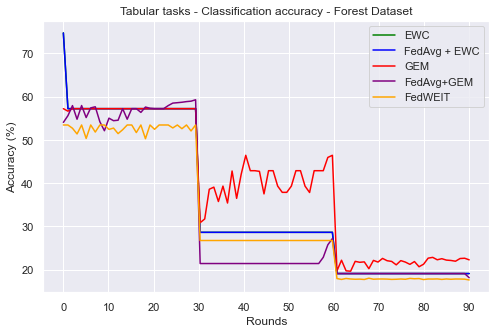

In [5]:
#Plotting each axis

#we have to add all the elements together. 

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 0], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 0], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 0], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 0], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Accuracy (%)")
ax.legend(loc= "upper right")
ax.set_title("Tabular tasks - Classification accuracy - Forest Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [6]:
#accuracy reduction per task

def mean_accuracies_per_task(dataset):
    mean_accs_tasks = []
    tasks = [29, 59, 89]

    #split the tasks into reasonable sizes.
    prev_task = 0 
    for i in range(len(tasks)):
        cur_task = tasks[i]
        values = []
        for j in range(prev_task, cur_task):
            values.append(dataset.iloc[j])
        #take the mean
        mean = np.mean(values)
        mean_accs_tasks.append(mean)
        prev_task = cur_task+1
    return mean_accs_tasks

ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 0])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 0])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 0])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 0])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 0])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

#add task list:



# average_values = []
# average_values.append(ewc_mean_task_accuracy)
# average_values.append(fedewc_mean_task_accuracy)
# average_values.append(fed)
# # for i in range(len(ewc_mean_task_accuracy)):



# print(28.608/57.8)
# print(19.072/57.8)


[57.82170090182074, 28.60850393772125, 19.072335958480835]
[57.82047518368425, 28.60850393772125, 19.072335958480835]
[57.197006940841675, 40.059643773169356, 21.67141832668206]
[56.60820471829381, 21.590587383714215, 19.072335958480835]
[52.70739656070183, 26.71984136104584, 17.80681262756216]


In [7]:
#now we build a function to calculate the difference
def task_decrease(mean_task_accuracies):
    values = [mean_task_accuracies[i+1] - mean_task_accuracies[i] for i in range(len(mean_task_accuracies)-1)]
    return values

def get_accuracy_decrease(dataset):
    return task_decrease(mean_accuracies_per_task(dataset))

ewc_task_decrease = get_accuracy_decrease(ewc.iloc[:, 0])
fedewc_task_decrease = get_accuracy_decrease(fedewc.iloc[:, 0])
gem_task_decrease = get_accuracy_decrease(gem.iloc[:, 0])
fedgem_task_decrease = get_accuracy_decrease(fedgem.iloc[:, 0])
fedweit_task_decrease = get_accuracy_decrease(fedweit.iloc[:, 0])

print(ewc_task_decrease)
print(fedewc_task_decrease)
print(gem_task_decrease)
print(fedgem_task_decrease)
print(fedweit_task_decrease)

[-29.21319696409949, -9.536167979240414]
[-29.211971245963003, -9.536167979240414]
[-17.13736316767232, -18.388225446487297]
[-35.0176173345796, -2.5182514252333803]
[-25.98755519965599, -8.913028733483682]


In [8]:
#Saving the figure
fig.savefig('Tabular Forest Accuracy.pdf')

## Backward Transfer

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

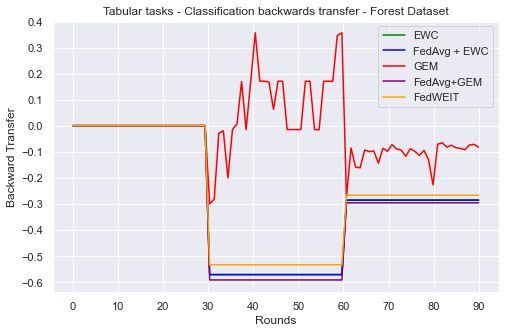

In [9]:
#Plotting each axis

#we have to add all the elements together

# print(gem_array.shape)

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 2], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 2], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 2], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 2], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 2], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Backward Transfer")
ax.legend(loc= "upper right")
ax.set_title("Tabular tasks - Classification backwards transfer - Forest Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [10]:
ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 2])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 2])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 2])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 2])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 2])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

[0.0, -0.572170078754425, -0.2860850393772125]
[0.0, -0.572170078754425, -0.2860850393772125]
[0.0, 0.06420920100705377, -0.10813032820306971]
[0.0, -0.5927456259727477, -0.29637281298637386]
[0.0, -0.5343968272209167, -0.2671984136104584]


In [11]:
# sns.sca(data=gem.reset_index(), x='index', y='Backwards Transfer')
# gem.max(), gem.min()
fig.savefig('Tabular Forest Backward Transfer.pdf')

# Emotions Data

In [12]:
# Selecting multiple files

directory = '../experimental_data/old_data'

ewcfile = '../experimental_data/iteration 1/ewc_emotions_experiment_1.csv'
fedewcfile = "../experimental_data/iteration 1/ewc_emotions_experiment_2.csv"
gemfile = "../experimental_data/iteration 1/gem_emotions_experiment_1.csv"
fedgemfile = "../experimental_data/iteration 1/gem_emotions_experiment_2.csv"
fedweitfile = "../experimental_data/iteration 1/weit_emotions_experiment_1.csv"

headers = ['Accuracy', "Loss", "Backwards Transfer"]
# datasets = ["EWC", "FedEWC", "GEM", "FedWEIT"]

ewc = pd.read_csv(ewcfile, header = None, names=headers)
fedewc = pd.read_csv(fedewcfile, header = None, names=headers)
gem = pd.read_csv(gemfile, header = None, names=headers)
fedgem = pd.read_csv(fedgemfile, header = None, names=headers)
fedweit = pd.read_csv(fedweitfile, header = None, names=headers)

# dataframes = [ewc, fedewc, gem, fedweit]


# data = pd.concat(dataframes, axis = 1, keys = datasets)

# print(data["EWC"])

x_axis = np.linspace(0, ewc.shape[0], ewc.shape[0])
    


## Accuracy

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

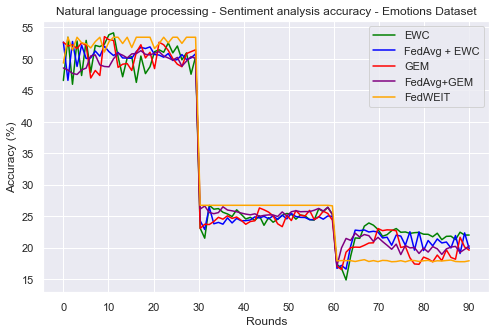

In [13]:
#Plotting each axis

#we have to add all the elements together. 

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 0], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 0], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 0], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 0], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Accuracy (%)")
ax.legend(loc= "upper right")
ax.set_title("Natural language processing - Sentiment analysis accuracy - Emotions Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [14]:
#accuracy reduction per task

def mean_accuracies_per_task(dataset):
    mean_accs_tasks = []
    tasks = [29, 59, 89]

    #split the tasks into reasonable sizes.
    prev_task = 0 
    for i in range(len(tasks)):
        cur_task = tasks[i]
        values = []
        for j in range(prev_task, cur_task):
            values.append(dataset.iloc[j])
        #take the mean
        mean = np.mean(values)
        mean_accs_tasks.append(mean)
        prev_task = cur_task+1
    return mean_accs_tasks


def task_decrease(mean_task_accuracies):
    values = [mean_task_accuracies[i+1] - mean_task_accuracies[i] for i in range(len(mean_task_accuracies)-1)]
    return values

def get_accuracy_decrease(dataset):
    return task_decrease(mean_accuracies_per_task(dataset))

ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 0])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 0])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 0])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 0])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 0])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

print(28.608/57.8)
print(19.072/57.8)


[50.345515279934325, 24.96267279674267, 21.53472622920727]
[50.665933284266245, 24.5802398591206, 20.891345780471276]
[50.67555945495079, 24.718489420825037, 19.6919155018083]
[49.78994067372947, 25.64622831755671, 20.24201647988681]
[52.72114835936448, 26.71984136104584, 17.87205710493285]
0.4949480968858132
0.3299653979238754


In [15]:
#now we build a function to calculate the difference


ewc_task_decrease = get_accuracy_decrease(ewc.iloc[:, 0])
fedewc_task_decrease = get_accuracy_decrease(fedewc.iloc[:, 0])
gem_task_decrease = get_accuracy_decrease(gem.iloc[:, 0])
fedgem_task_decrease = get_accuracy_decrease(fedgem.iloc[:, 0])
fedweit_task_decrease = get_accuracy_decrease(fedweit.iloc[:, 0])

print(ewc_task_decrease)
print(fedewc_task_decrease)
print(gem_task_decrease)
print(fedgem_task_decrease)
print(fedweit_task_decrease)

[-25.382842483191656, -3.4279465675354004]
[-26.085693425145646, -3.688894078649323]
[-25.957070034125756, -5.026573919016737]
[-24.14371235617276, -5.404211837669898]
[-26.001306998318636, -8.847784256112991]


In [16]:

#Backwar transfer
ewc_task_decrease = get_accuracy_decrease(ewc.iloc[:, 0])
fedewc_task_decrease = get_accuracy_decrease(fedewc.iloc[:, 0])
gem_task_decrease = get_accuracy_decrease(gem.iloc[:, 0])
fedgem_task_decrease = get_accuracy_decrease(fedgem.iloc[:, 0])
fedweit_task_decrease = get_accuracy_decrease(fedweit.iloc[:, 0])

print(ewc_task_decrease)
print(fedewc_task_decrease)
print(gem_task_decrease)
print(fedgem_task_decrease)
print(fedweit_task_decrease)

[-25.382842483191656, -3.4279465675354004]
[-26.085693425145646, -3.688894078649323]
[-25.957070034125756, -5.026573919016737]
[-24.14371235617276, -5.404211837669898]
[-26.001306998318636, -8.847784256112991]


In [17]:
#Saving the figure
fig.savefig('NLP Emotions Accuracy.pdf')

## Backward Transfer

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

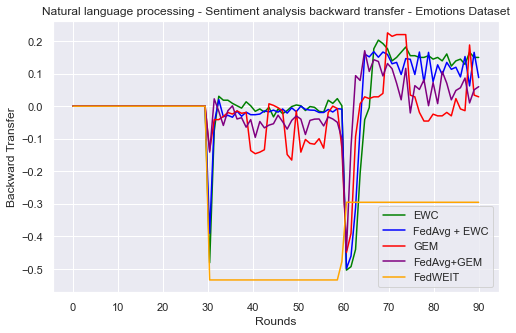

In [18]:
#Plotting each axis

#we have to add all the elements together

# print(gem_array.shape)

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 2], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 2], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 2], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 2], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 2], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Backward Transfer")
ax.legend(loc= "lower right")
ax.set_title("Natural language processing - Sentiment analysis backward transfer - Emotions Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [19]:
# sns.sca(data=gem.reset_index(), x='index', y='Backwards Transfer')
# gem.max(), gem.min()
fig.savefig('NLP Emotions Backward Transfer.pdf')

In [20]:
ewc_bwt_mean = np.mean(ewc.iloc[:, 2])
fedewc_bwt_mean = np.mean(fedewc.iloc[:, 2])
gem_bwt_mean = np.mean(gem.iloc[:, 2])
fedgem_bwt_mean = np.mean(fedgem.iloc[:, 2])
weit_bwt_mean = np.mean(fedweit.iloc[:, 2])


print(ewc_bwt_mean)
print(fedewc_bwt_mean)
print(gem_bwt_mean)
print(fedgem_bwt_mean)
print(weit_bwt_mean)

0.016340041160583497
0.012353804310162865
-0.018979452384842756
0.00020440949334038605
-0.27600058257579807


In [21]:
ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 2])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 2])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 2])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 2])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 2])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

[0.0, -0.020394517429943734, 0.06588223062712571]
[0.0, -0.03034657671533777, 0.06596569603887094]
[0.0, -0.06811516860435747, 0.012671303132484695]
[0.0, -0.046837526970896194, 0.048856889584968796]
[0.0, -0.5343968272209167, -0.295491099357605]


# Images Data

In [22]:
# Selecting multiple files

directory = '../experimental_data/old_data'

ewcfile = '../experimental_data/iteration 1/ewc_image_experiment_1.csv'
fedewcfile = "../experimental_data/iteration 1/ewc_image_experiment_2.csv"
gemfile = "../experimental_data/iteration 1/gem_image_experiment_1.csv"
fedgemfile = "../experimental_data/iteration 1/gem_image_experiment_2.csv"
fedweitfile = "../experimental_data/iteration 1/weit_image_experiment_1.csv"

headers = ['Accuracy', "Loss", "Backwards Transfer"]
# datasets = ["EWC", "FedEWC", "GEM", "FedWEIT"]

ewc = pd.read_csv(ewcfile, header = None, names=headers)
fedewc = pd.read_csv(fedewcfile, header = None, names=headers)
gem = pd.read_csv(gemfile, header = None, names=headers)
fedgem = pd.read_csv(fedgemfile, header = None, names=headers)
fedweit = pd.read_csv(fedweitfile, header = None, names=headers)

# dataframes = [ewc, fedewc, gem, fedweit]


# data = pd.concat(dataframes, axis = 1, keys = datasets)

# print(data["EWC"])

x_axis = np.linspace(0, ewc.shape[0], ewc.shape[0])
    


## Accuracy

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

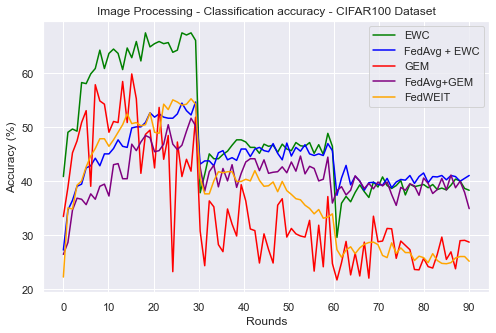

In [23]:
#Plotting each axis

#we have to add all the elements together. 

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 0], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 0], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 0], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 0], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Accuracy (%)")
ax.legend(loc= "upper right")
ax.set_title("Image Processing - Classification accuracy - CIFAR100 Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [24]:
#accuracy reduction per task

def mean_accuracies_per_task(dataset):
    mean_accs_tasks = []
    tasks = [29, 59, 89]

    #split the tasks into reasonable sizes.
    prev_task = 0 
    for i in range(len(tasks)):
        cur_task = tasks[i]
        values = []
        for j in range(prev_task, cur_task):
            values.append(dataset.iloc[j])
        #take the mean
        mean = np.mean(values)
        mean_accs_tasks.append(mean)
        prev_task = cur_task+1
    return mean_accs_tasks

ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 0])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 0])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 0])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 0])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 0])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

print(28.608/57.8)
print(19.072/57.8)


[61.455172608638634, 45.69310319834742, 38.3747128577068]
[46.5310344511065, 45.09310340059215, 40.1333330006435]
[47.38620673788005, 30.84137912454276, 26.609195409149958]
[42.055172159753994, 41.958620568801614, 38.87586190782744]
[47.53793073111567, 38.431034396434654, 26.55172408654772]
0.4949480968858132
0.3299653979238754


In [25]:
#now we build a function to calculate the difference
def task_decrease(mean_task_accuracies):
    values = [mean_task_accuracies[i+1] - mean_task_accuracies[i] for i in range(len(mean_task_accuracies)-1)]
    return values

def get_accuracy_decrease(dataset):
    return task_decrease(mean_accuracies_per_task(dataset))

ewc_task_decrease = get_accuracy_decrease(ewc.iloc[:, 0])
fedewc_task_decrease = get_accuracy_decrease(fedewc.iloc[:, 0])
gem_task_decrease = get_accuracy_decrease(gem.iloc[:, 0])
fedgem_task_decrease = get_accuracy_decrease(fedgem.iloc[:, 0])
fedweit_task_decrease = get_accuracy_decrease(fedweit.iloc[:, 0])

print(ewc_task_decrease)
print(fedewc_task_decrease)
print(gem_task_decrease)
print(fedgem_task_decrease)
print(fedweit_task_decrease)

[-15.762069410291211, -7.318390340640626]
[-1.4379310505143508, -4.9597703999486455]
[-16.54482761333729, -4.232183715392804]
[-0.0965515909523802, -3.0827586609741715]
[-9.106896334681018, -11.879310309886936]


In [26]:
#Saving the figure
fig.savefig('Image Cifar Accuracy.pdf')

## Backward Transfer

c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\minic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

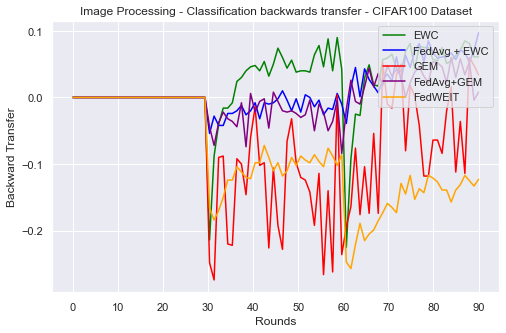

In [27]:
#Plotting each axis

#we have to add all the elements together

# print(gem_array.shape)

fig, ax = plt.subplots(figsize = (8,5))
# , marker = 'o', markevery=30, markersize =7
sns.lineplot(x_axis, ewc.iloc[:, 2], color = 'green', x = "rounds", y = "accuracy (%)", ax = ax, label = "EWC")
sns.lineplot(x_axis, fedewc.iloc[:, 2], color = 'blue', ax = ax, label = "FedAvg + EWC")
sns.lineplot(x_axis, gem.iloc[:, 2], color = 'red', ax = ax, label = "GEM")
sns.lineplot(x_axis, fedgem.iloc[:, 2], color = 'purple', ax = ax, label = "FedAvg+GEM")
sns.lineplot(x_axis, fedweit.iloc[:, 2], color = 'orange', ax = ax, label = "FedWEIT")
# plt
ax.set_xlabel('Rounds')
ax.set_ylabel("Backward Transfer")
ax.legend(loc= "upper right")
ax.set_title("Image Processing - Classification backwards transfer - CIFAR100 Dataset")
# ax.axvline(30)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# print(data["Accuracy"])
# sns.lineplot(data=data, x=x_axis, y = 'Accuracy')
# sns.lineplot(x_axis, fedewc.iloc[:, 0], color = 'blue')

In [28]:
# sns.sca(data=gem.reset_index(), x='index', y='Backwards Transfer')
# gem.max(), gem.min()
fig.savefig('Image Cifar Backward Transfer.pdf')

In [29]:
ewc_mean_task_accuracy = mean_accuracies_per_task(ewc.iloc[:, 2])
fedewc_mean_task_accuracy = mean_accuracies_per_task(fedewc.iloc[:, 2])
gem_mean_task_accuracy = mean_accuracies_per_task(gem.iloc[:, 2])
fedgem_mean_task_accuracy = mean_accuracies_per_task(fedgem.iloc[:, 2])
fedweit_mean_task_accuracy = mean_accuracies_per_task(fedweit.iloc[:, 2])


print(ewc_mean_task_accuracy)
print(fedewc_mean_task_accuracy)
print(gem_mean_task_accuracy)
print(fedgem_mean_task_accuracy)
print(fedweit_mean_task_accuracy)

[0.0, 0.026827558361250756, 0.037275834330197]
[0.0, -0.0160689717736737, 0.045482751110504364]
[0.0, -0.1399310385358744, -0.05910345295379899]
[0.0, -0.026068966553128965, 0.02903448641300197]
[0.0, -0.11013792835432902, -0.160586207899554]
